Images shape: (2656, 256, 256, 3)
[[212. 212. 217. 222. 228.]
 [212. 212. 217. 222. 228.]
 [218. 218. 221. 221. 219.]
 [224. 224. 226. 222. 212.]
 [231. 231. 232. 224. 206.]]
Masks shape: (2656, 256, 256, 6)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


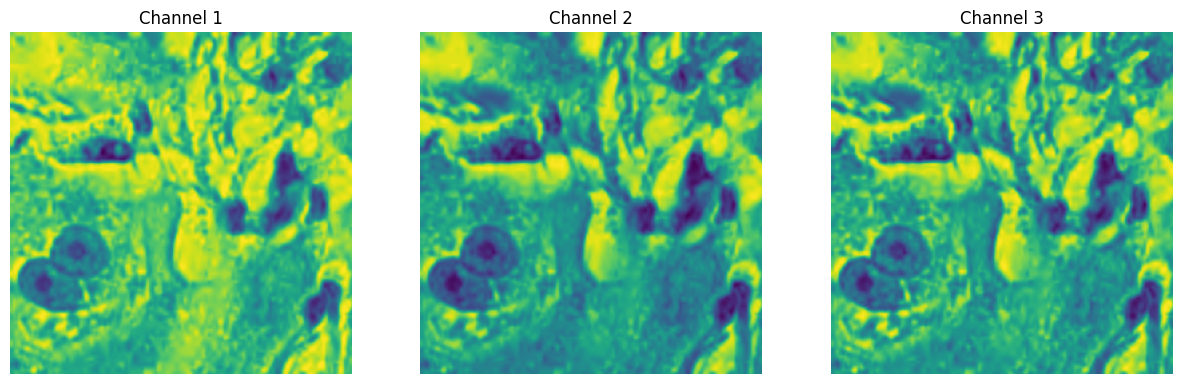

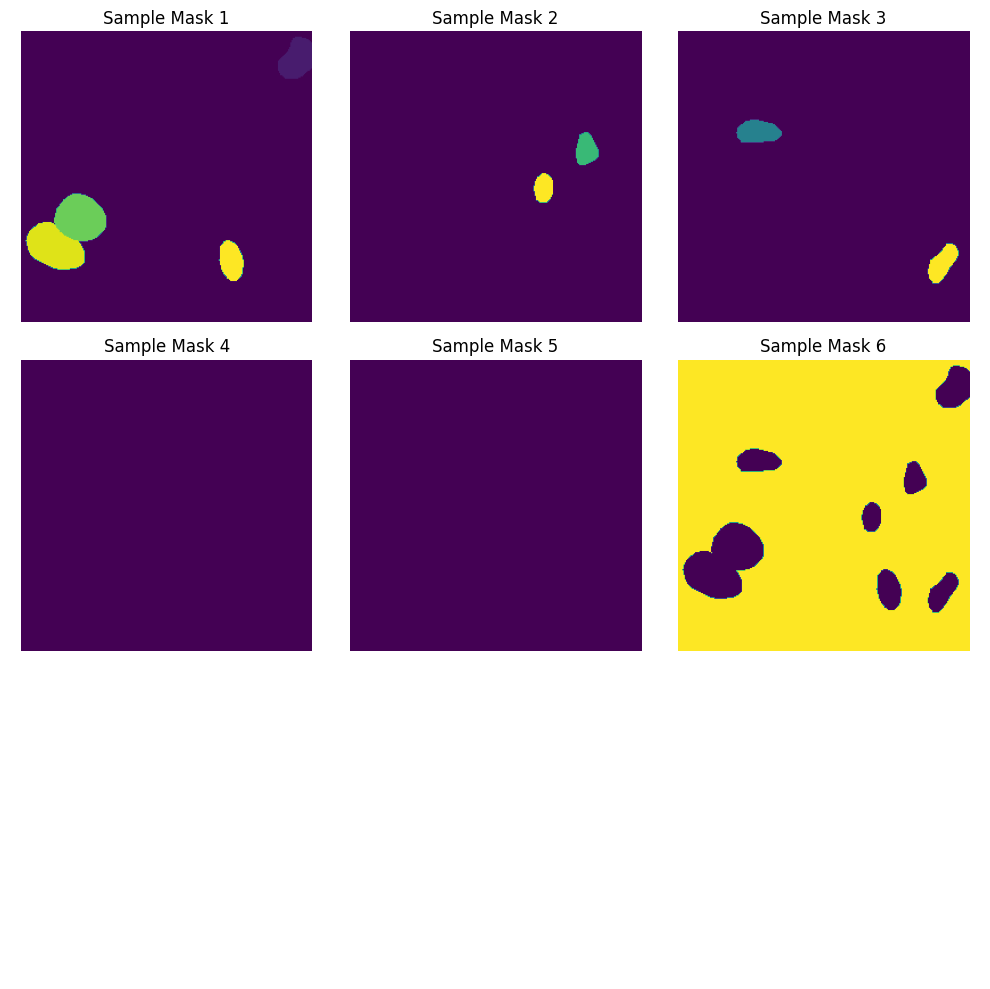

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the paths to the .npy files
image_file = '../data/raw/pannuke/Fold 1/images/fold1/images.npy'
mask_file = '../data/raw/pannuke/Fold 1/masks/fold1/masks.npy'

# Load the images and masks
images = np.load(image_file)
masks = np.load(mask_file)

# Inspect the shape of the loaded arrays
print(f"Images shape: {images.shape}")
print(images[0, :5, :5, 0]) 
print(f"Masks shape: {masks.shape}")
print(masks[0, :5, :5, 0]) 


# Display a sample image and its corresponding mask
sample_index = 0
sample_image = images[sample_index]
sample_mask = masks[sample_index]

# Display each channel of the image separately
num_channels = sample_image.shape[-1]
num_channels_masks = sample_mask.shape[-1]

plt.figure(figsize=(15, 5))

for i in range(num_channels):
    plt.subplot(1, num_channels, i + 1)
    plt.imshow(sample_image[:, :, i])
    plt.title(f'Channel {i + 1}')
    plt.axis('off')

plt.show()

rows = 3
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

# Loop through each channel and plot
for i in range(rows * cols):
    ax = axes[i // cols, i % cols]
    if i < num_channels_masks:
        ax.imshow(sample_mask[:, :, i])
        ax.set_title(f'Sample Mask {i + 1}')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [17]:
# Load the types.npy file
masks_path = '../data/raw/pannuke/Fold 1/masks/fold1/masks.npy'  # Replace with the actual path to your types.npy file
masks = np.load(masks_path)

# Inspect the shape and contents of the types array
print(f"Types shape: {masks.shape}")
print(f"Unique types: {np.unique(masks[0][:,:,0])}")

Types shape: (2656, 256, 256, 6)
Unique types: [ 0.  3. 31. 38. 40.]


In [12]:
# Load the types.npy file
types_path = '../data/raw/pannuke/Fold 1/images/fold1/types.npy'  # Replace with the actual path to your types.npy file
types = np.load(types_path)

# Inspect the shape and contents of the types array
print(f"Types shape: {types.shape}")
print(f"Unique types: {np.unique(types)}")

Types shape: (2656,)
Unique types: ['Adrenal_gland' 'Bile-duct' 'Bladder' 'Breast' 'Cervix' 'Colon'
 'Esophagus' 'HeadNeck' 'Kidney' 'Liver' 'Lung' 'Ovarian' 'Pancreatic'
 'Prostate' 'Skin' 'Stomach' 'Testis' 'Thyroid' 'Uterus']


In [14]:
sample_mask[:, :, 5]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

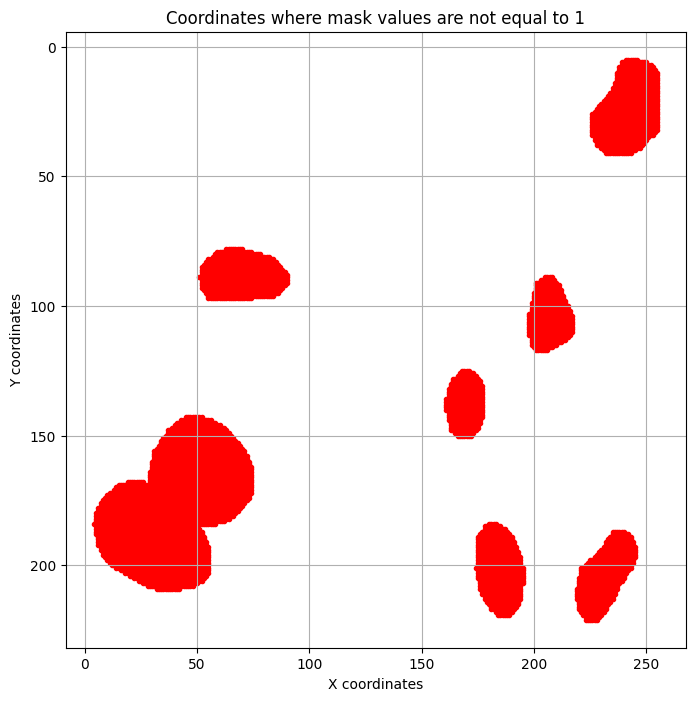

In [15]:
# Assuming sample_mask[:, :, 5] is your mask where 1 indicates presence and 0 indicates absence
mask = sample_mask[:, :, 5]

# Find coordinates where mask values are not equal to 1
non_one_indices = np.where(mask != 1)
y_coords, x_coords = non_one_indices  # Get the y and x coordinates

# Plotting the coordinates
plt.figure(figsize=(8, 8))
plt.scatter(x_coords, y_coords, marker='.', color='red')
plt.title('Coordinates where mask values are not equal to 1')
plt.xlabel('X coordinates')
plt.ylabel('Y coordinates')
plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates (optional)
plt.grid(True)
plt.show()

In [ ]:
for mask in masks:
    mask = mask[:,:, -1]

masks save to npy